# 作业2：图像的傅立叶变换
Author: Wei Jiangnan 2024.9
--------------------------------------------------------------------------------------------------------------------------
#### 本作业中，需要你实现以下变换：
- 二维快速离散傅立叶变换
- 二维快速离散傅立叶逆变换
- 若有困难，可以实现一般的离散傅立叶变换算法，但是会有一定的分数惩罚。
- **注意：** 本作业提供的图像长宽均为2的整数次幂，可以直接使用快速傅立叶变换算法，不需要使用其他方法进行插值。
- **注意：** 实现基于递归的快速傅立叶变换算法即可，若有兴趣，可以尝试实现基于码位倒序的递推快速傅立叶变换算法。
--------------------------------------------------------------------------------------------------------------------------
#### 在实现以上变换的基础上，你需要完成以下任务：
- 对一张灰度图像进行傅立叶变换，并显示其频谱图像
- 对上述图像进行傅立叶逆变换，并显示其结果
- 对于上述图像的傅立叶变换结果，将其低频部分转移到图像中心，并显示其结果
- 对频移后的图像进行傅立叶逆变换，并显示其结果
- 在频率域对图像进行高通滤波，并显示其结果
- 在频率域对图像进行低通滤波，并显示其结果


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import warnings
warnings.filterwarnings("ignore")

### 1 傅立叶变换、逆变换和平移频谱（70）
#### 1-1 一维离散傅立叶变换（20）
- 对一维离散信号进行快速傅立叶变换。
- 函数原型为：`dft1d(f)`，其中`f`为一维离散信号。
- 返回值为一维离散傅立叶变换后的结果。

In [2]:
def dft1d(f):
    '''
    Args:
        f: 1d numpy array, input signal
    Returns:
        F: 1d numpy array, DFT of f
    '''
    #compete your code here
    N = f.size
    if N<=1:
        return f
    G_even = dft1d(f[0::2])# 偶数下标做傅里叶变换
    H_odd = dft1d(f[1::2])# 奇数下标做傅里叶变换
    H_W = np.exp(-2j * np.pi * np.arange(N // 2) / N) * H_odd # 后半部分的傅里叶变换 
    # 前半部分是F_k，后半部分是F_k+N/2，用列表连接符相连
    # return np.concatenate([G_even[k] + H_W[k] for k in range(N // 2)] , [G_even[k] - H_W[k] for k in range(N // 2)]) 
    return np.concatenate([G_even + H_W, G_even - H_W]) 


#### 1-2 一维离散傅立叶逆变换（10）
- 对一维离散信号进行快速傅立叶逆变换。
- 函数原型为：`idft1d(F)`，其中`F`为一维傅立叶频谱。
- 返回值为一维离散傅立叶逆变换后的结果。

In [3]:
def idft1d(F):
    '''
    Args:
        F: 1d numpy array, DFT of f
    Returns:
        f: 1d numpy array, IDFT of F
    
    #compete your code here
    N = F.size
    if N<=1:
        return F
    g_even = idft1d(F[0::2])# 偶数下标做傅里叶变换
    h_odd = idft1d(F[1::2])# 奇数下标做傅里叶变换
    h_w = np.exp(2j * np.pi * np.arange(N // 2) / N) * h_odd # 后半部分的傅里叶变换 
    # 前半部分是F_k，后半部分是F_k+N/2，用列表连接符相连
    # return np.concatenate([G_even[k] + H_W[k] for k in range(N // 2)] , [G_even[k] - H_W[k] for k in range(N // 2)]) 
    return np.concatenate([g_even + h_w, g_even - h_w]) / N 
    '''
    N = F.size
    return np.conj(dft1d(np.conj(F))) / N

#### 1-3 二维离散傅立叶变换（20）
- 对二维离散信号进行傅立叶变换。
- 函数原型为：`dft2d(f)`，其中`f`为二维灰度图像。
- 返回值为二维离散傅立叶变换后的结果。

In [4]:
def dft2d(f):
    '''
    Args:
        f: 2d numpy array, input signal
    Returns:
        F: 2d numpy array, DFT of f
    '''
    #compete your code here
    # 也就是说，按照二维傅里叶变换的可分离性质，先对每一行做一维傅里叶变换，然后对每一列做一维傅里叶变换
    dft_row = np.apply_along_axis(dft1d, axis=1, arr=f) # 对每一行做一维傅里叶变换
    F = np.apply_along_axis(dft1d, axis=0, arr=dft_row) # 对每一列做一维傅里叶变换
    return F

#### 1-4 二维离散傅立叶逆变换（10）
- 对二维离散信号进行傅立叶逆变换。
- 函数原型为：`idft2d(F)`，其中`F`为二维傅立叶频谱。
- 返回值为二维离散傅立叶逆变换后的结果。

In [5]:
def idft2d(F):
    '''
    Args:
        F: 2d numpy array, DFT of f
    Returns:
        f: 2d numpy array, IDFT of F
    '''
    #compete your code here
    idft_row = np.apply_along_axis(idft1d, axis=1, arr=F) # 对每一行做一维傅里叶逆变换
    f = np.apply_along_axis(idft1d, axis=0, arr=idft_row) # 对每一列做一维傅里叶逆变换
    return f

#### 二维离散傅立叶变换结果的中心化（10）
- 将二维离散傅立叶变换的结果中的低频部分转移到图像中心。
- 函数原型为：`shift_dft2d(F)`，其中`F`为二维傅立叶频谱。
- 返回值为中心化后的二维离散傅立叶变换结果。

In [6]:
def shift_dft2d(F):
    '''
    Args:
        F: 2d numpy array, DFT of f
    Returns:    
        F_shift: 2d numpy array, shifted DFT of f
    '''
    #compete your code here
    # 将零频率移到图像中心，因为低频部分在图像的四个角，所以移动步长是N//2
    rows, cols = F.shape
    F_shift = np.zeros((rows, cols), dtype=complex)
    for i in range(rows):
        for j in range(cols):
            # 将频率对应的值重新赋值给中间的点
            F_shift[i, j] = F[(i + rows // 2) % rows, (j + cols // 2) % cols]
    return F_shift


傅里叶变换中的低频和高频是指信号中不同频率成分的分类，主要用于分析信号的频率特性。

### 1. 低频成分

- **定义**：低频成分指的是频率较低的信号成分，通常对应于信号的缓慢变化部分。
- **特点**：在图像处理中，低频通常代表图像的平滑区域、整体轮廓和主要形状。低频成分对图像的结构和基本特征影响较大。
- **在频谱中的位置**：在傅里叶变换的频谱中，低频成分通常位于频谱的中心位置。

### 2. 高频成分

- **定义**：高频成分指的是频率较高的信号成分，通常对应于信号中的快速变化部分。
- **特点**：在图像处理中，高频成分主要代表图像的细节、边缘和纹理。高频成分能反映出图像中的快速变化和细微特征。
- **在频谱中的位置**：在傅里叶变换的频谱中，高频成分通常位于频谱的边缘位置。

### 在图像处理中

- **低通滤波**：主要保留低频成分，去除高频成分，适用于平滑图像、去噪等。
- **高通滤波**：主要保留高频成分，去除低频成分，适用于增强图像的边缘和细节。

高频部分在频谱的边缘、低频部分在频谱的中间，主要与傅里叶变换的性质以及频谱的表示方式有关。

### 1. 傅里叶变换的性质

傅里叶变换将时域信号（如图像）转换为频域信号，其中频域信号的每个点表示信号中不同频率成分的幅度和相位。频率越高，对应的周期越短，变化越快。

### 2. 频谱的表示方式

在傅里叶变换中，频率的范围是从 \(0\) 到 \(N-1\)（其中 \(N\) 是信号的长度），在频谱中：

- **低频成分**：通常对应于低频信号变化的区域，频谱的中心位置（通常为 \(0\) 频率）对应于缓慢变化的部分。这些成分对应于信号的整体趋势或平均值。
- **高频成分**：这些成分对应于信号快速变化的部分，例如边缘或细节，通常位于频谱的边缘。在图像频谱中，高频成分的频率接近采样频率的一半（即 Nyquist 频率）。

### 3. 频谱中心化

在进行傅里叶变换后，通常会使用频谱中心化的方法（如 `np.fft.fftshift`），将低频部分移动到频谱的中心位置，这样更易于观察。通过这种方式，频谱的布局变为：

- **中心部分**：低频成分，表示信号的基本形状和结构。
- **边缘部分**：高频成分，表示信号的细节和变化。

#### 验证二维离散傅立叶变换
- `运行下面代码即可，无需修改。`
- 对于'cat.png'图像，将其转换为灰度图像，并对其进行二维离散傅立叶变换，显示其频谱图像。
- 将频谱图与`numpy.fft.fft2`函数的结果进行比较，若两者相同，则输出'dft correct'，否则输出'dft wrong'。
- 对频谱图像进行傅立叶逆变换，并显示其结果,并与原图像进行比较，若两者相同，则输出'idft correct'，否则输出'idft wrong'。
- 将频谱图像进行中心化，并显示其结果，与`numpy.fft.fftshift`函数的结果进行比较，若两者相同，则输出'shift correct'，否则输出'shift wrong'。
- **注意：** 傅里叶变换运行时间可能较长，需要数十秒。
- 若有兴趣，可以尝试提高运行速度。


In [7]:
cat = cv2.imread('./cat.png', cv2.IMREAD_GRAYSCALE)
cat = cv2.resize(cat, (512, 512))
cat = cat.astype(np.float64)

dft_cat= dft2d(cat)
dft_cat_shift = shift_dft2d(dft_cat)

np_dft_cat = np.fft.fft2(cat)
np_dft_cat_shift = np.fft.fftshift(np_dft_cat)

idft_cat = idft2d(dft_cat)
idft_cat_shift = idft2d(dft_cat_shift)

np_idft_cat = np.fft.ifft2(np_dft_cat)
np_idft_cat_shift = np.fft.ifft2(np_dft_cat_shift)


#### 1-5 验证二维离散傅立叶变换
- `运行下面代码即可，无需修改。`
- 若你的代码实现正确，展示的两幅频谱图像应该相同，并且会输出'dft correct'。

dft correct


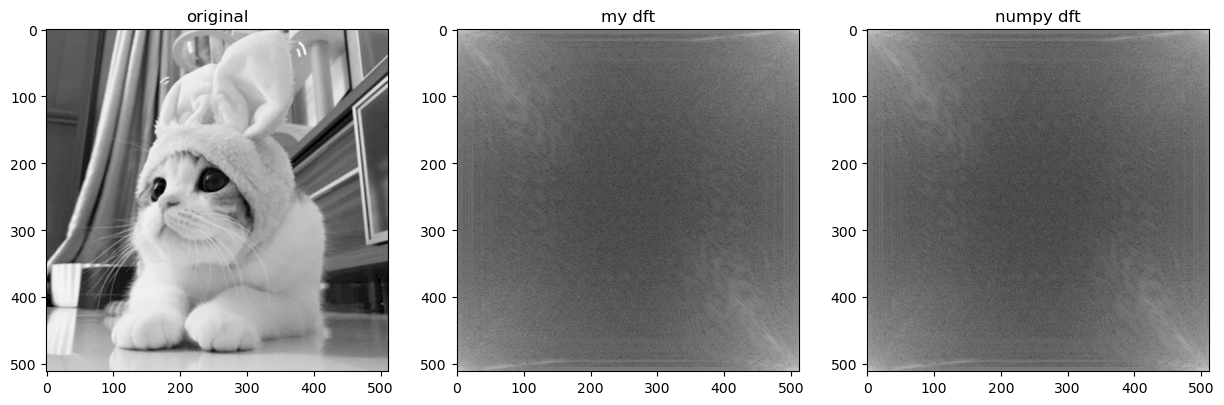

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(dft_cat)), cmap='gray')
plt.title('my dft')
plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(np_dft_cat)), cmap='gray')
plt.title('numpy dft')
if np.abs(dft_cat-np_dft_cat).max() < 1e-6:
    print('dft correct')
else:
    print('dft wrong')


#### 1-6 验证移动频谱
- `运行下面代码即可，无需修改。`
- 若你的代码实现正确，展示的两幅频谱图像应该相同，并且会输出'dft shift correct'。

dft shift correct


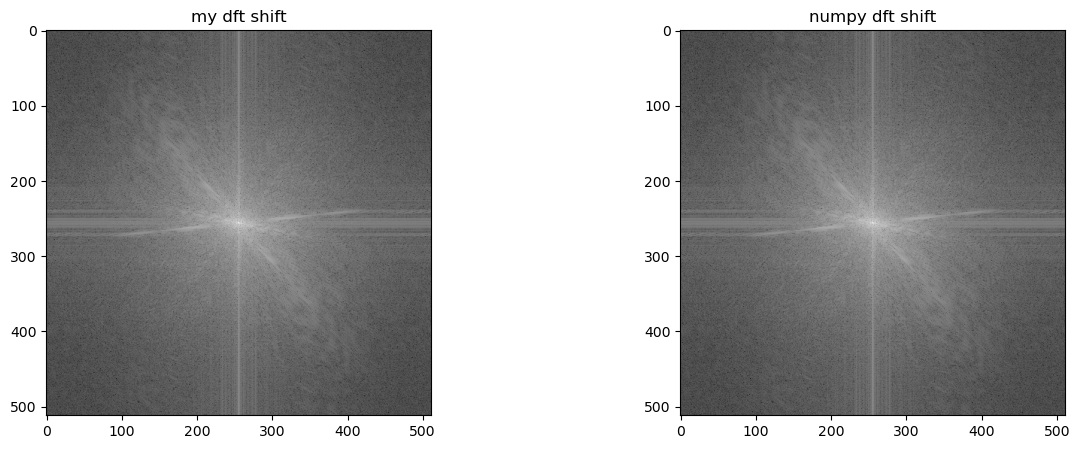

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(dft_cat_shift)), cmap='gray')
plt.title('my dft shift')
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(np_dft_cat_shift)), cmap='gray')
plt.title('numpy dft shift')
if np.abs(dft_cat_shift-np_dft_cat_shift).max() < 1e-6:
    print('dft shift correct')
else:
    print('dft shift wrong')

#### 1-7 验证二维离散傅立叶逆变换
- `运行下面代码即可，无需修改。`
- 若你的代码实现正确，展示的两幅图像应该相同，并且会输出'idft correct'。

idft correct


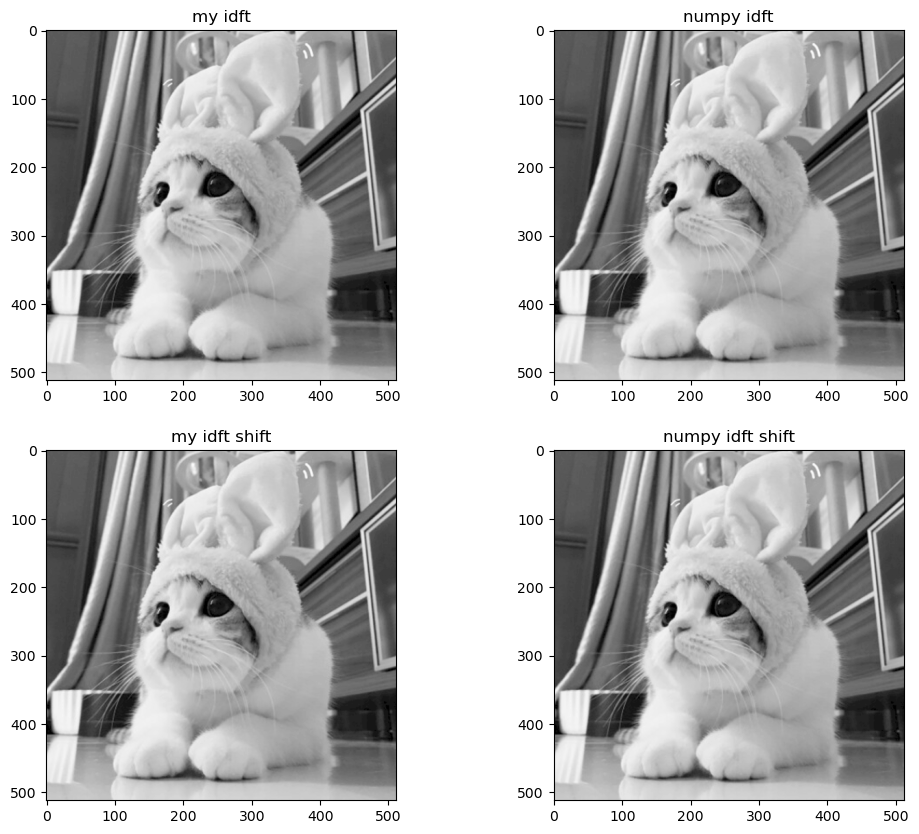

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(np.abs(idft_cat), cmap='gray')
plt.title('my idft')
plt.subplot(2,2,2)
plt.imshow(np.abs(np_idft_cat), cmap='gray')
plt.title('numpy idft')
plt.subplot(2,2,3)
plt.imshow(np.abs(idft_cat_shift), cmap='gray')
plt.title('my idft shift')
plt.subplot(2,2,4)
plt.imshow(np.abs(np_idft_cat_shift), cmap='gray')
plt.title('numpy idft shift')
if np.abs(idft_cat-np_idft_cat).max() < 1e-6:
    print('idft correct')
else:
    print('idft wrong')

### 2 频率域滤波（30）
#### 2-1 高通滤波（15）
- 在频率域对图像进行高通滤波，并显示滤波所用的mask、滤波后的频谱图以及滤波后的图像。
- 函数原型为：`highpass_filter(F)`，其中`F`为二维傅立叶频谱。
- 返回值为高通滤波后的二维傅立叶频谱以及滤波所用的mask。
- 本作业采用的图像大小为$512\times 512$，可以根据这个大小自行定义截止频率。


In [11]:
def highpass_filter(F):
    '''
    Args:
        F: 2d numpy array, DFT of f
    Returns:
        F_h: 2d numpy array, DFT of f after high pass filter
        mask: 2d numpy array, filter mask
    '''
    #compete your code here
    rows, cols = F.shape
    r = 40
    mask = np.ones((rows, cols), np.float32)
    
    # 正方形的高通滤波器
    # mask[rows // 2 -r : rows // 2 + r, cols // 2 - r : cols // 2 + r] = 0

    # 圆形的高通滤波器
    x, y = np.meshgrid(np.arange(rows), np.arange(cols))
    mask = np.where((x - rows // 2) ** 2 + (y - cols // 2) ** 2 < r ** 2, 0, 1)
    F_h = F * mask

    return F_h, mask

#### 2-2 展示高通滤波结果
- `运行下面代码即可，无需修改。`

Text(0.5, 1.0, 'high pass image')

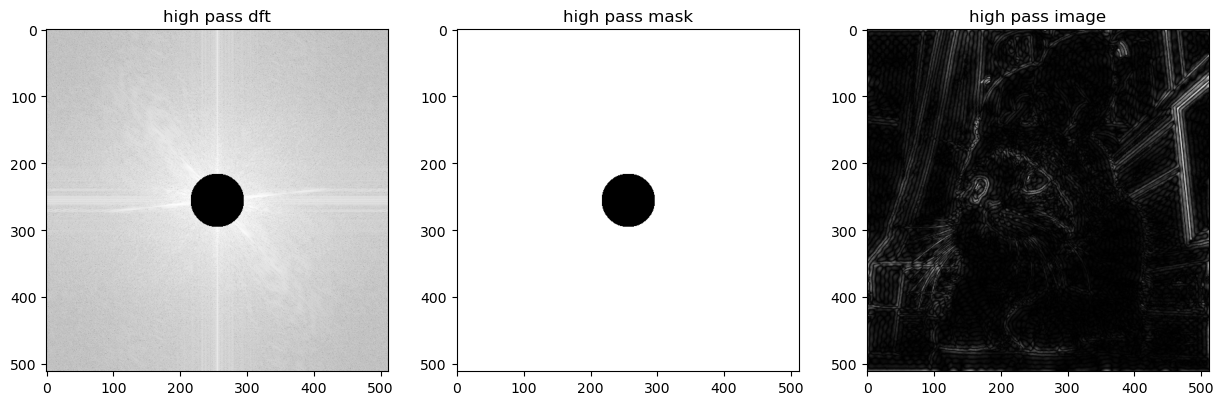

In [12]:
high_pass_dft_cat, mask = highpass_filter(dft_cat_shift)
high_pass_image = np.abs(idft2d(high_pass_dft_cat))
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(high_pass_dft_cat+1e-7)), cmap='gray')
plt.title('high pass dft')
plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title('high pass mask')
plt.subplot(1,3,3)
plt.imshow(high_pass_image, cmap='gray')
plt.title('high pass image')


#### 2-3 低通滤波（15）
- 在频率域对图像进行低通滤波，并显示滤波所用的mask、滤波后的频谱图以及滤波后的图像。
- 函数原型为：`highpass_filter(F)`，其中`F`为二维傅立叶频谱。
- 返回值为低通滤波后的二维傅立叶频谱以及滤波所用的mask。
- 本作业采用的图像大小为$512\times 512$，可以根据这个大小自行定义截止频率。

In [13]:
def lowpass_filter(F):
    '''
    Args:
        F: 2d numpy array, DFT of f
    Returns:
        F_l: 2d numpy array, DFT of f after low pass filter
        mask: 2d numpy array, filter mask
    '''
    #compete your code here
    rows, cols = F.shape
    r = 40
    mask = np.ones((rows, cols), np.float32)
    
    # 正方形的高通滤波器
    # mask[rows // 2 -r : rows // 2 + r, cols // 2 - r : cols // 2 + r] = 1

    # 圆形的高通滤波器
    x, y = np.meshgrid(np.arange(rows), np.arange(cols))
    mask = np.where((x - rows // 2) ** 2 + (y - cols // 2) ** 2 < r ** 2, 1, 0)
    F_h = F * mask

    return F_h, mask

#### 2-4 展示低通滤波结果
- `运行下面代码即可，无需修改。`

Text(0.5, 1.0, 'low pass image')

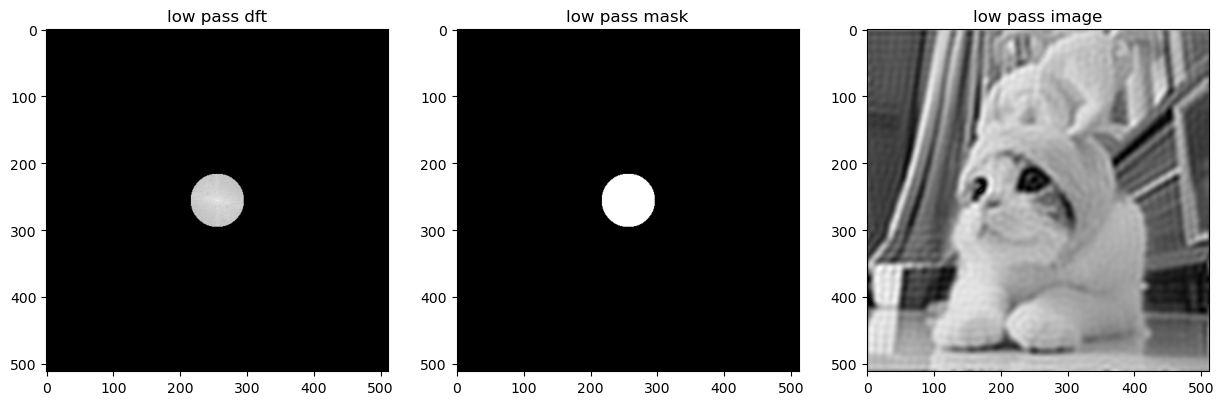

In [14]:
low_pass_dft_cat, mask = lowpass_filter(dft_cat_shift)
low_pass_image = np.abs(idft2d(low_pass_dft_cat))
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(low_pass_dft_cat+1e-7)), cmap='gray')
plt.title('low pass dft')
plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title('low pass mask')
plt.subplot(1,3,3)
plt.imshow(low_pass_image, cmap='gray')
plt.title('low pass image')


##### 实验收获与感悟
- 请在这里给出你对本次实验的收获与感悟，可以是对本次实验的建议，也可以是对本次实验的心得体会，或者是对本次实验的意见和建议。
+ 本次作业主要学习任务和完成工作：
    1. 傅里叶变换-->离散傅里叶变换-->快速傅里叶变换（以及逆变换）
        + 递推实现
    2. 一维傅里叶变换-->二维傅里叶变换
        + 相当于对沿着两个方向做傅里叶变换（一行行FFT之后再一列列FFT，或者先一列列FFT后一行行FFT）
    3. 频移
        + FFT后低频信息在频谱图的四个角，移动到中心
    4. 滤波
        + 相当于设置一个蒙版